In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df = pd.read_csv('data/nuclear_weapons_stockpiles.csv')

In [56]:
df.head(10)

,country_name,year,nuclear_weapons_stockpile
0,China,1945,0
1,China,1946,0
2,China,1947,0
3,China,1948,0
4,China,1949,0
5,China,1950,0
6,China,1951,0
7,China,1952,0
8,China,1953,0
9,China,1954,0


In [57]:
latest_data = df.groupby('country_name')['year'].max().reset_index()
latest_data = latest_data.merge(df, on=['country_name', 'year'], how='inner')
latest_data = latest_data.rename(columns={'year': 'latest_year', 'nuclear_weapons_stockpile': 'latest_nuclear_stockpile'})
print(latest_data)


     country_name  latest_year  latest_nuclear_stockpile
0           China         2022                       350
1          France         2022                       290
2           India         2022                       160
3          Israel         2022                        90
4     North Korea         2022                        20
5        Pakistan         2022                       165
6          Russia         2022                      4477
7    South Africa         2022                         0
8  United Kingdom         2022                       180
9   United States         2022                      3708


Summary Statistics:
       latest_year  latest_nuclear_stockpile
count         10.0                 10.000000
mean        2022.0                944.000000
std            0.0               1672.714295
min         2022.0                  0.000000
25%         2022.0                107.500000
50%         2022.0                172.500000
75%         2022.0                335.000000
max         2022.0               4477.000000


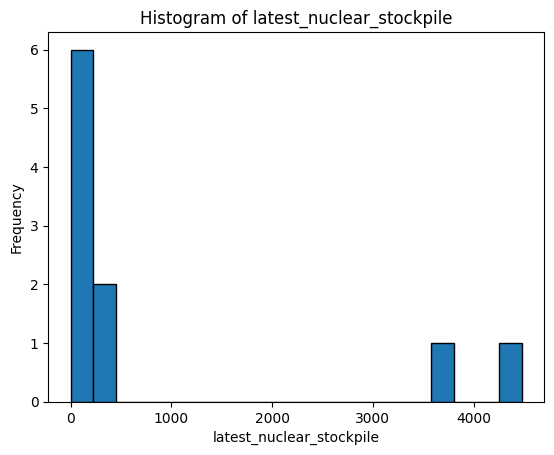

In [58]:
class EDA:
    def __init__(self, data):
        self.data = data

    def summary_statistics(self):
        return self.data.describe()

    def histogram(self, column):
        plt.hist(self.data[column], bins=20, edgecolor='k')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()


eda = EDA(latest_data)
print("Summary Statistics:")
print(eda.summary_statistics())
eda.histogram('latest_nuclear_stockpile')

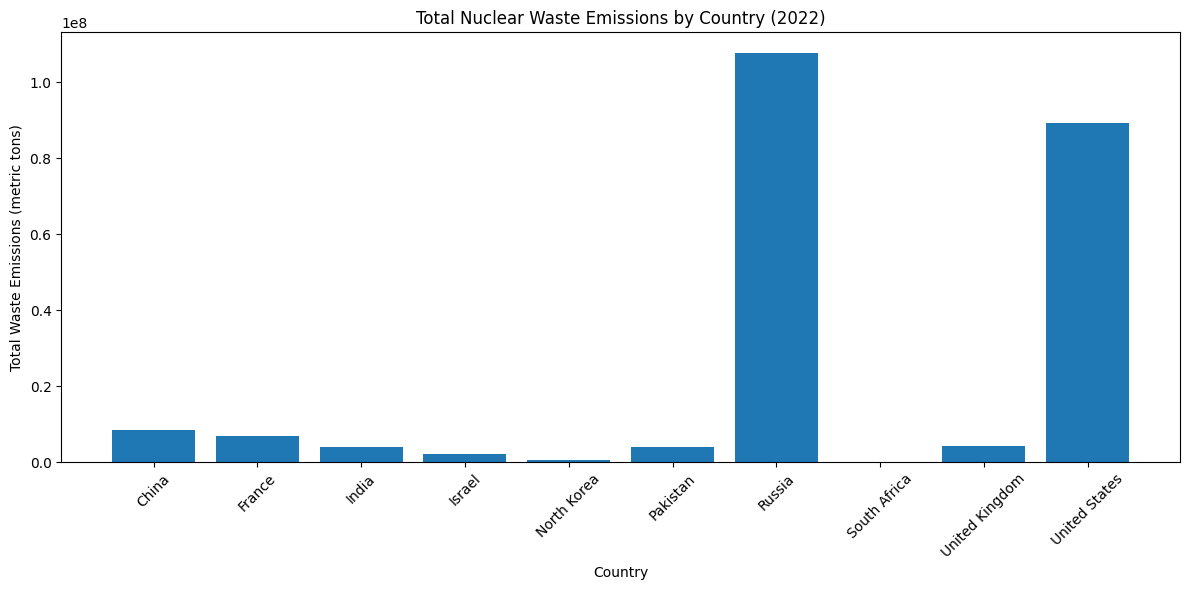

In [62]:
nuclear_waste_data = {
    "China": NuclearWasteData(2000, 2000, 12000, 12000, 50, 7),
    "France": NuclearWasteData(2000, 2000, 12000, 12000, 50, 7),
    "India": NuclearWasteData(2000, 2000, 12000, 12000, 50, 7),
    "Israel": NuclearWasteData(2000, 2000, 12000, 12000, 50, 7),
    "North Korea": NuclearWasteData(2000, 2000, 12000, 12000, 50, 7),
    "Pakistan": NuclearWasteData(2000, 2000, 12000, 12000, 50, 7),
    "Russia": NuclearWasteData(2000, 2000, 12000, 12000, 50, 7),
    "South Africa": NuclearWasteData(2000, 2000, 12000, 12000, 50, 7),
    "United Kingdom": NuclearWasteData(2000, 2000, 12000, 12000, 50, 7),
    "United States": NuclearWasteData(2000, 2000, 12000, 12000, 50, 7),
}

country_data = [
    CountryData("China", 2022, 350),
    CountryData("France", 2022, 290),
    CountryData("India", 2022, 160),
    CountryData("Israel", 2022, 90),
    CountryData("North Korea", 2022, 20),
    CountryData("Pakistan", 2022, 165),
    CountryData("Russia", 2022, 4477),
    CountryData("South Africa", 2022, 0),
    CountryData("United Kingdom", 2022, 180),
    CountryData("United States", 2022, 3708),
]

for country in country_data:
    country.set_nuclear_waste(nuclear_waste_data[country.country_name])

total_waste_emissions = []
for country in country_data:
    total_emissions = (
        country.latest_nuclear_stockpile * country.nuclear_waste.plutonium_waste / 1000  # Convert to metric tons
        + country.latest_nuclear_stockpile * country.nuclear_waste.uranium_waste / 1000  # Convert to metric tons
        + country.latest_nuclear_stockpile * country.nuclear_waste.strontium_90
        + country.latest_nuclear_stockpile * country.nuclear_waste.cesium_137
        + country.latest_nuclear_stockpile * country.nuclear_waste.low_level_waste
        + country.latest_nuclear_stockpile * country.nuclear_waste.transuranic_waste
    )
    total_waste_emissions.append(total_emissions)

waste_data = pd.DataFrame({
    'Country': [country.country_name for country in country_data],
    'Total Waste Emissions (metric tons)': total_waste_emissions
})

plt.figure(figsize=(12, 6))
plt.bar(waste_data['Country'], waste_data['Total Waste Emissions (metric tons)'])
plt.xlabel('Country')
plt.ylabel('Total Waste Emissions (metric tons)')
plt.title('Total Nuclear Waste Emissions by Country (2022)')
plt.xticks(rotation=45)
plt.tight_layout()
